# Business Case: Yulu - Hypothesis Testing

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How you can help here?**

# The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands

**Importing all useful libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import binom,expon,norm,ttest_ind,ttest_rel,chi2_contingency,chisquare,chi2,poisson,f_oneway,f
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [2]:
df=pd.read_csv("yulu.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.shape

(10886, 12)

there is 12 columns and 10886 rows present in dataset

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Observation**

there is difference in mean and median for  casual and registered user , so
there is outlier in casual and registered user

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


All columns are in numerical format except one columns
datetime column is in object format  

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is no null value present in dataset

In [ ]:
df["workingday"].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

**observation**

if day is neither weekend nor holiday is 1, otherwise is 0.

Total 68.08 % days are  working
and 31.91% are holiday or weekend

In [ ]:
df["holiday"].value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [ ]:
df["season"].value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

 **Season**

 1: spring, 2: summer, 3: fall, 4: winter

 in all season there is equal numbers so it means in all season people take bike on rent

In [ ]:
df["weather"].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

**weather:**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Observation**

People use to take bike on rent more in clear weather and less in heavy rain

In [ ]:
print("Total casual users in percentage",(df["casual"].sum()/df["count"].sum())*100,'\n',"Total registered users in percentage",(df["registered"].sum()/df["count"].sum())*100)

Total casual users in percentage 18.8031413451893 
 Total registered users in percentage 81.1968586548107


**Observation**

There is total 18.81% casual users and total registered user is 81.19%

it means registered users take more bike on rent

In [ ]:
df["atemp"].min(),df["atemp"].max()

(0.76, 45.455)

Min and max feeling temp

In [ ]:
df["temp"].min(),df["temp"].max()

(0.82, 41.0)

Min and max temp

In [ ]:
df["humidity"].min(),df["humidity"].max()

(0, 100)

min and max humidity

In [ ]:
df["windspeed"].min(),df["windspeed"].max()

(0.0, 56.9969)

min and max windspeed

In [ ]:
date=pd.to_datetime(df["datetime"])
print("starting date",date.min(),"End_Date",date.max())
print("Total number of days",(date.max()-date.min()))

starting date 2011-01-01 00:00:00 End_Date 2012-12-19 23:00:00
Total number of days 718 days 23:00:00


**Observation**

dataset contain total 718 days of data

In [ ]:
col = ['datetime','season'	,'holiday'	,'workingday',	'weather'	,'temp','atemp',	'humidity',	'windspeed',	'casual',	'registered',	'count']
for i in range(1,len(col)):
  print(df[col[i]].nunique(),col[i])
print(df["datetime"].str.slice(start=0,stop=10).nunique(),col[0])

4 season
2 holiday
2 workingday
4 weather
49 temp
60 atemp
89 humidity
28 windspeed
309 casual
731 registered
822 count
456 datetime


Total number of unique value in each column

In [ ]:
df.groupby(df["datetime"].str.slice(start=0,stop=10))["count"].sum().sort_values(ascending=False)

datetime
2012-09-15    8714
2012-05-19    8294
2012-09-09    8227
2012-10-05    8156
2012-06-02    8120
              ... 
2011-04-16     795
2011-12-07     705
2011-01-18     683
2011-03-10     623
2011-03-06     605
Name: count, Length: 456, dtype: int64

total users by each date

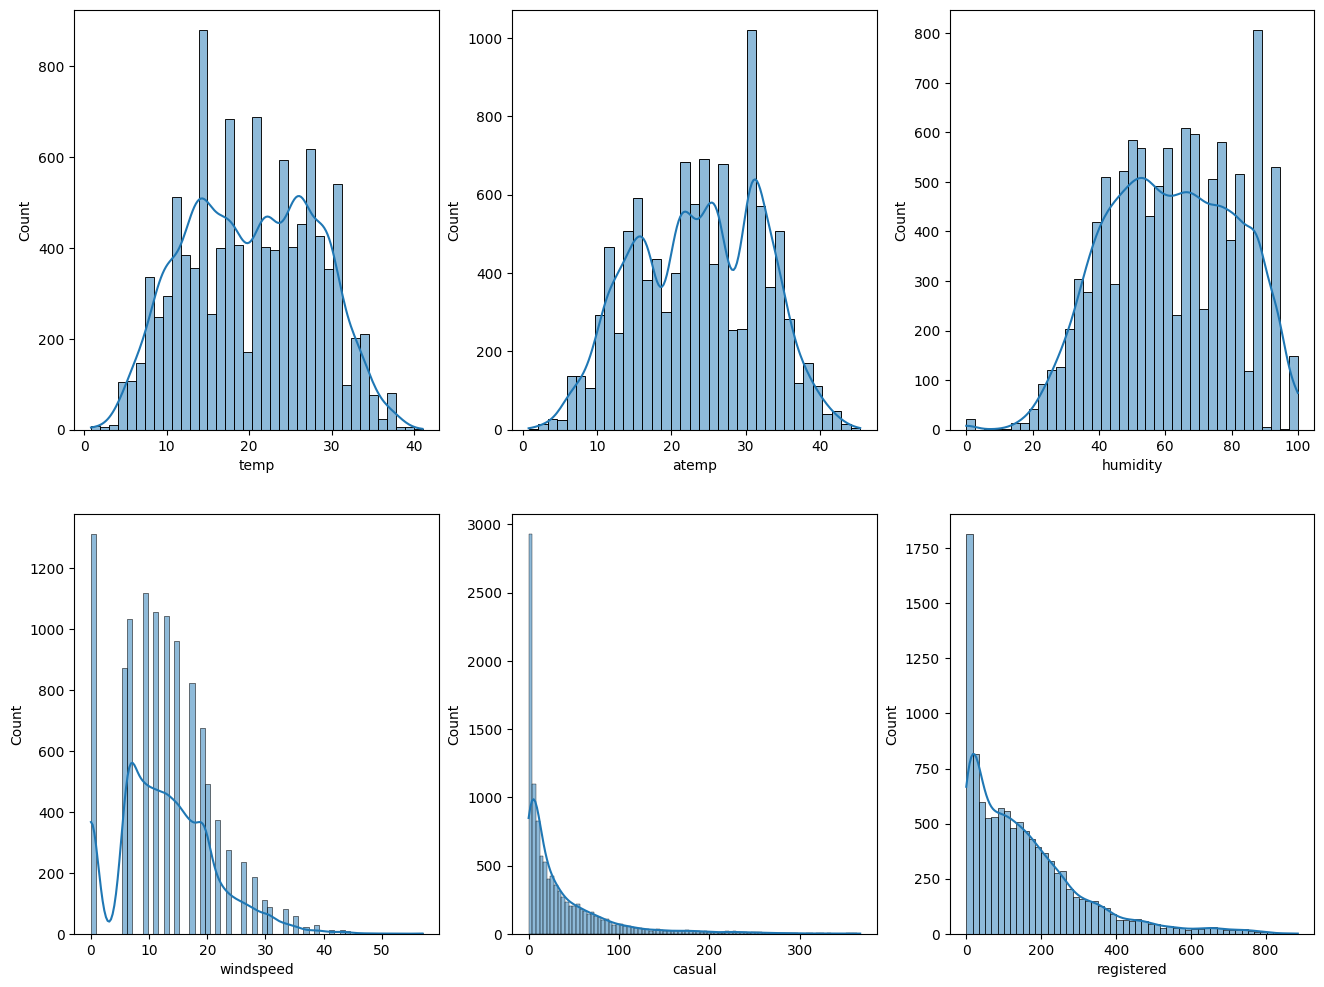

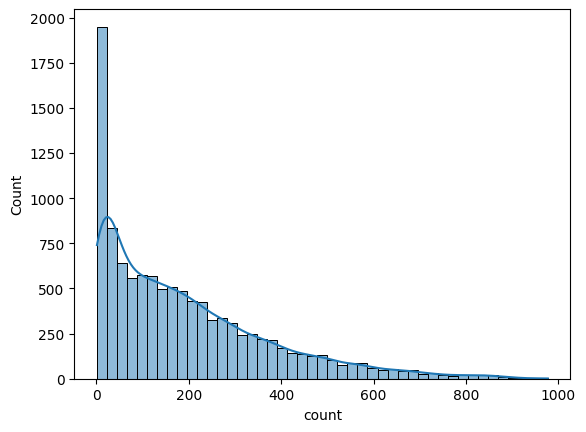

In [ ]:
num_cols = ['temp','atemp',	'humidity',	'windspeed',	'casual',	'registered',	'count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

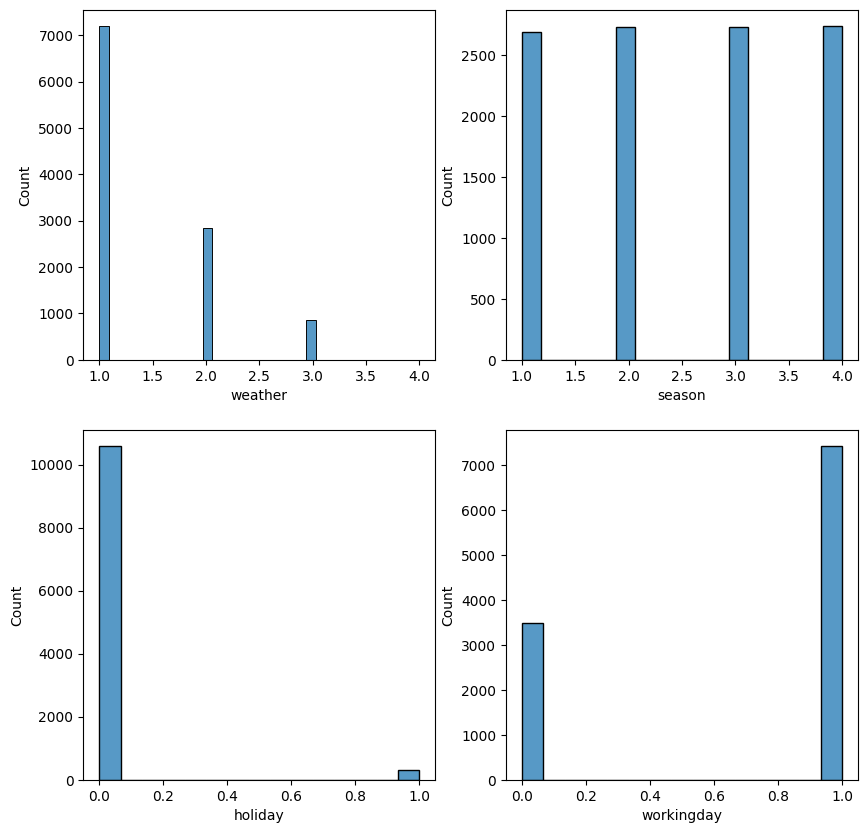

In [ ]:
cate_cols = ['weather',"season","holiday","workingday"]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(df[cate_cols[index]], ax=axis[row, col])
        index += 1

plt.show()

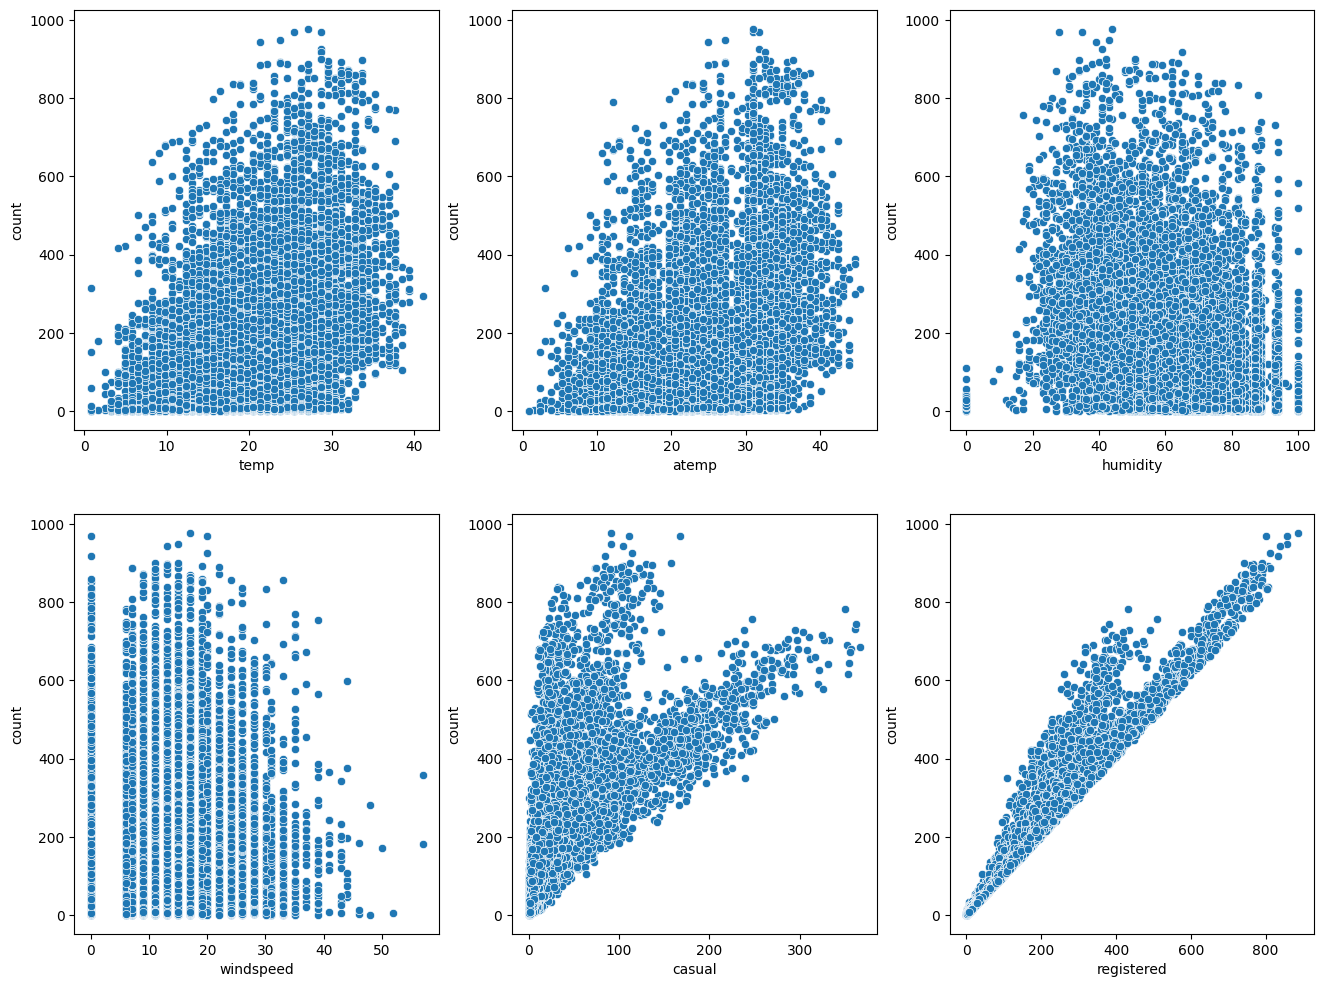

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

<Axes: xlabel='weather', ylabel='count'>

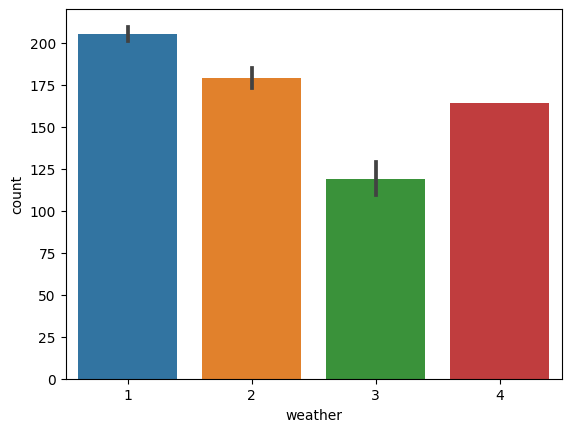

In [ ]:
sns.barplot(df,x="weather",y="count")

<Axes: xlabel='season', ylabel='count'>

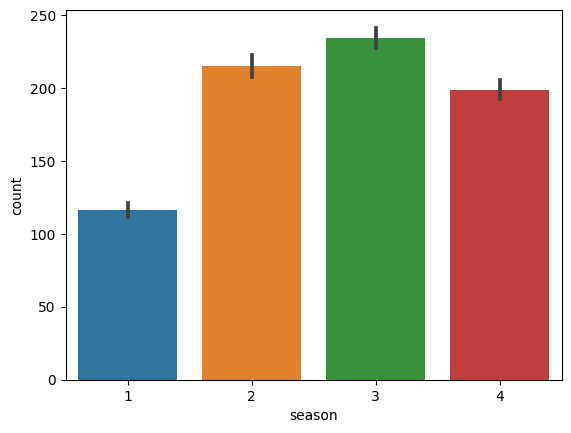

In [ ]:
sns.barplot(df,x="season",y="count")

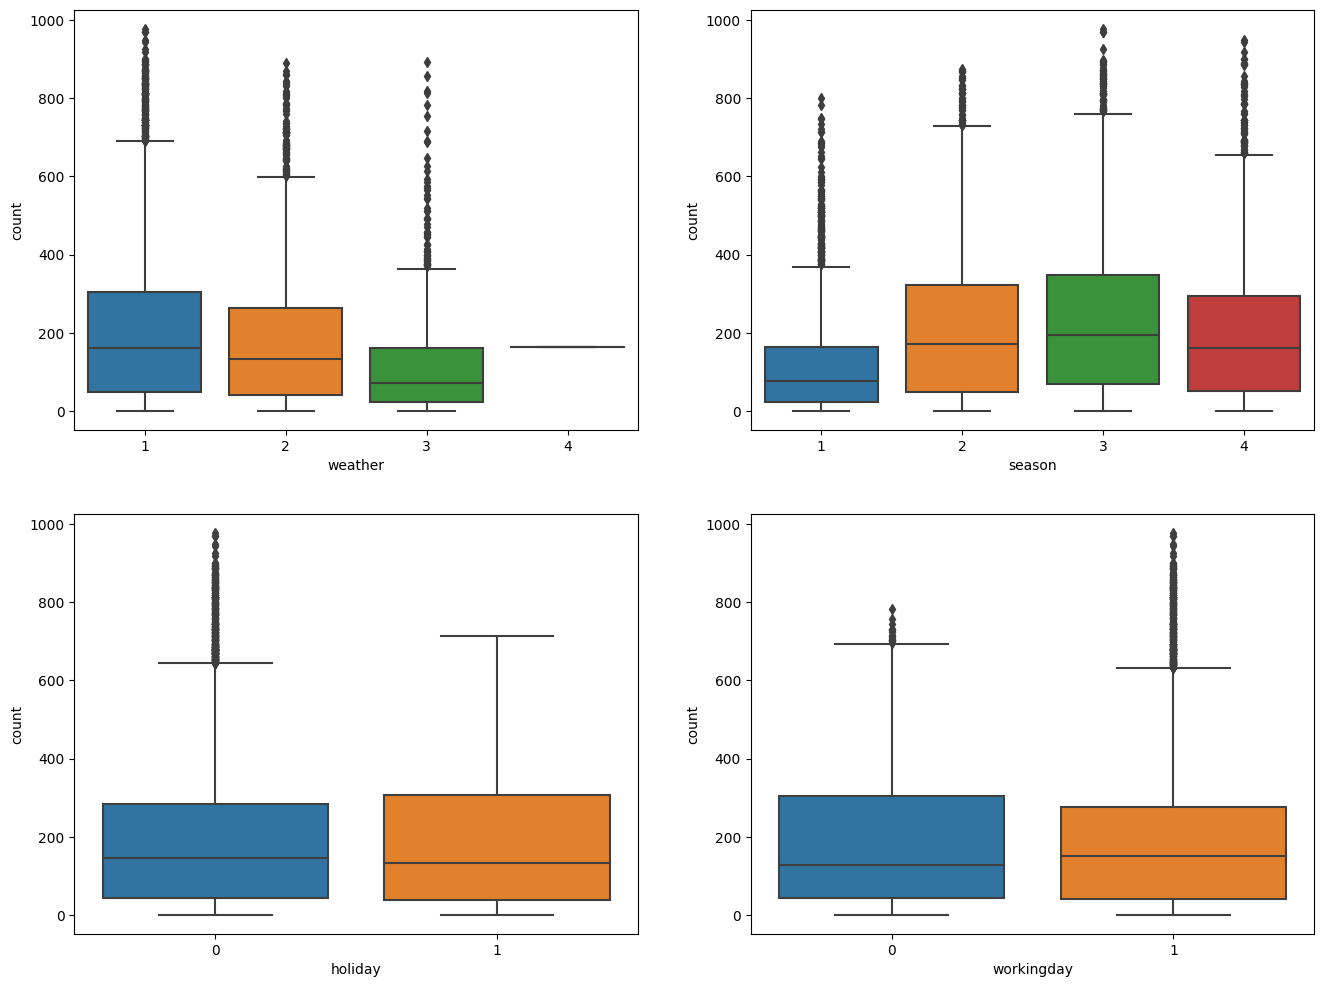

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cate_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

In [ ]:
df.corr()["count"]

<ipython-input-129-5972482df935>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["count"]


season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

<ipython-input-128-e8082a86e294>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


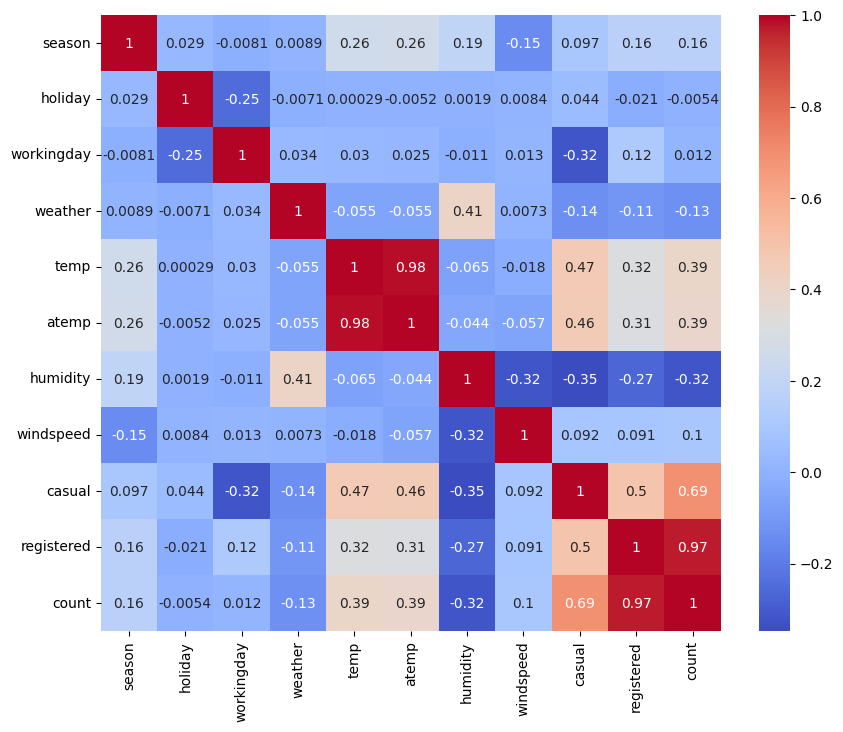

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Pairplot for all variable correlation to eachother

[]

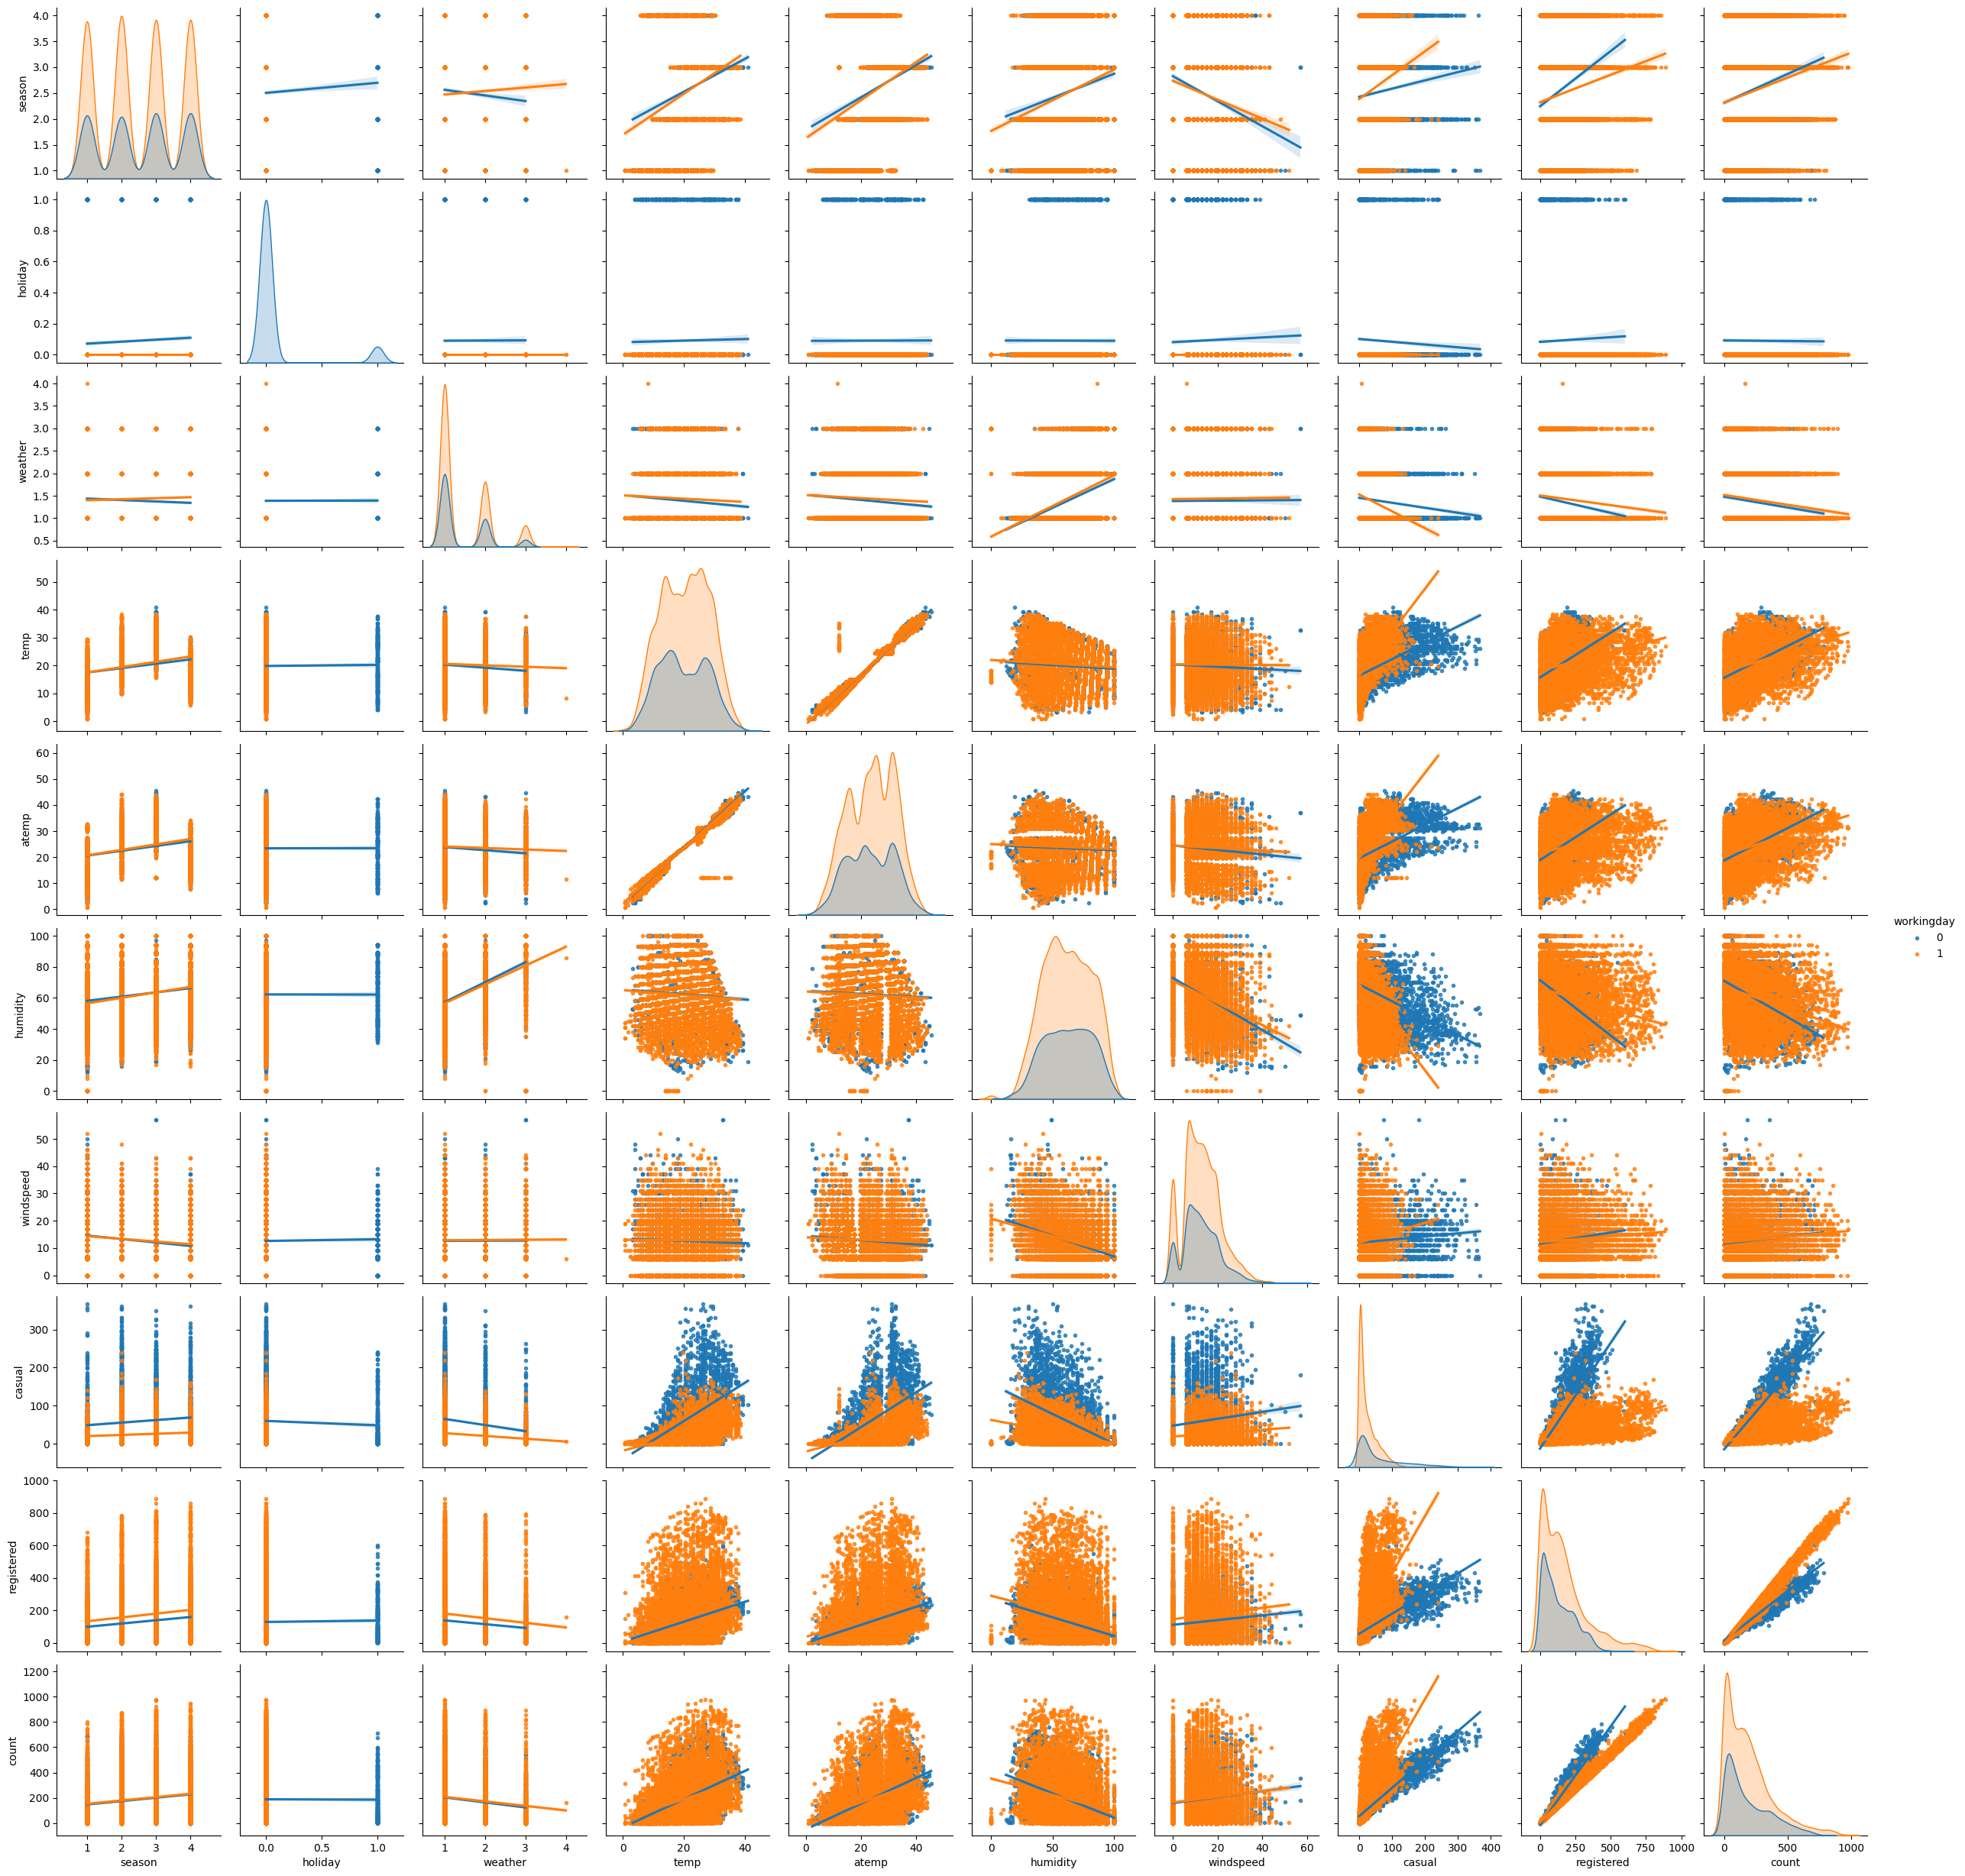

In [ ]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

# Hypothesis Testing
**2- Sample T-Test**

to check if Working Day has an effect on the number of electric cycles rented

Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

In [49]:
working=df[df["workingday"]==0]['count'].values
non_working=df[df["workingday"]==1]['count'].values

In [50]:
t_stat,pvalue=ttest_ind(working,non_working)
alpha=0.05
if pvalue>alpha:
  print("fail to reject null hypothesis")
else:
  print("reject null hypothesis")
print("p-value",pvalue)

fail to reject null hypothesis
p-value 0.22644804226361348


# Distribution check using QQ Plot

Figure(1000x500) [<Axes: > <Axes: >]


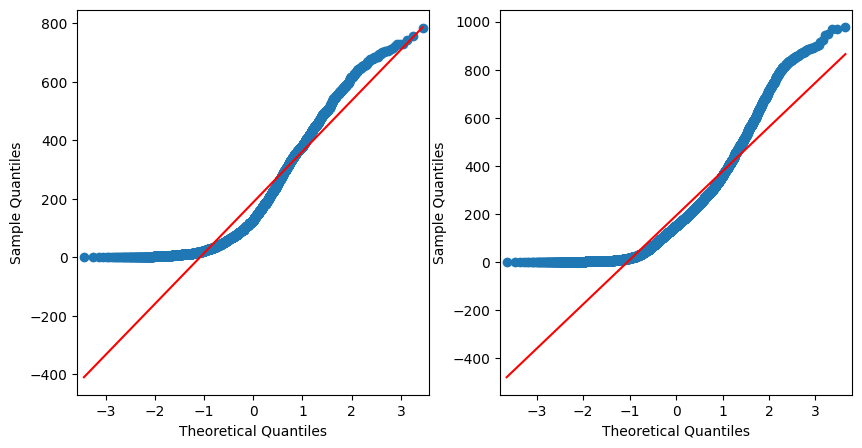

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
qqplot(df[df['workingday']==0]['count'],line='s',ax=axis[0])
qqplot(df[df['workingday']==1]['count'],line='s',ax=axis[1])
plt.show()

# Shapiro–Wilk test

**Test of normality**

To check Workingday  follow Gaussian  Distribution or not

Null Hypothesis : The sample follows normal distribution
Alternate Hypothesis : The sample does not follow normal distribution

alpha = 0.05

In [42]:
test_stat, p_value = stats.shapiro(df[df['workingday']==0]['count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.905987962555114e-40
The sample does not follow normal distribution


In [43]:
test_stat, p_value = stats.shapiro(df[df['workingday']==1]['count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.253237268584257e-40
The sample does not follow normal distribution


# Homogeneity of Variances using Lavene's test

Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous Variance

In [52]:
test_stat, p_value = stats.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.6059573472546238
The samples have Homogenous Variance 


# ANNOVA

to check if No. of cycles rented is similar or different in different 1. weather 2. season

NUll Hypothesis : No. of cycles rented similar in different seasons

Alternate Hypothesis : No. of cycles rented is not similar in different seasons

In [62]:
sea1=df[df["season"]==1]['count'].values
sea2=df[df["season"]==2]['count'].values
sea3=df[df["season"]==3]['count'].values
sea4=df[df["season"]==4]['count'].values

In [64]:
stat,pvalue=f_oneway(sea1,sea2,sea3,sea4)
if pvalue>alpha:
  print("fail to reject null hypothesis: No. of cycles rented similar in different seasons")
else:
  print("reject null hypothesis: No. of cycles rented is not similar in different seasons")
print("P-value: ",pvalue)

reject null hypothesis: No. of cycles rented is not similar in different seasons
P-value:  6.164843386499654e-149


NUll Hypothesis : No. of cycles rented similar in different weather

Alternate Hypothesis : No. of cycles rented is not similar in different weather


In [66]:
wea1=df[df["weather"]==1]['count'].values
wea2=df[df["weather"]==2]['count'].values
wea3=df[df["weather"]==3]['count'].values
wea4=df[df["weather"]==4]['count'].values

In [67]:
stat,pvalue=f_oneway(wea1,wea2,wea3,wea4)
alpha=0.05
if pvalue>alpha:
  print("fail to reject null hypothesis: No. of cycles rented is  similar in different weather")
else:
  print("reject null hypothesis: No. of cycles rented is not similar in different weather")
print("p-value",pvalue)

reject null hypothesis: No. of cycles rented is not similar in different weather
p-value 5.482069475935669e-42


Since p value is less than alpha so we  have enough evidence to reject the null hypothesis

# Distribution check using QQ Plot

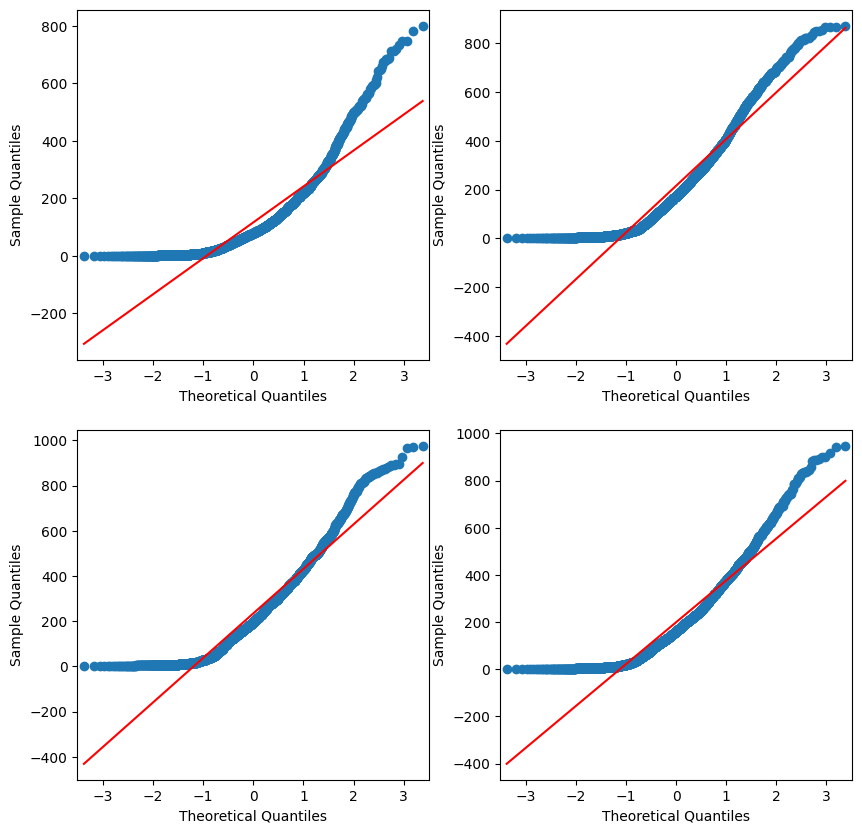

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
qqplot(df[df["season"]==1]["count"]  ,line='s',ax=axis[0,0])
qqplot(df[df["season"]==2]["count"]  ,line='s',ax=axis[0,1])
qqplot(df[df["season"]==3]["count"]  ,line='s',ax=axis[1,0])
qqplot(df[df["season"]==4]["count"]  ,line='s',ax=axis[1,1])
plt.show()

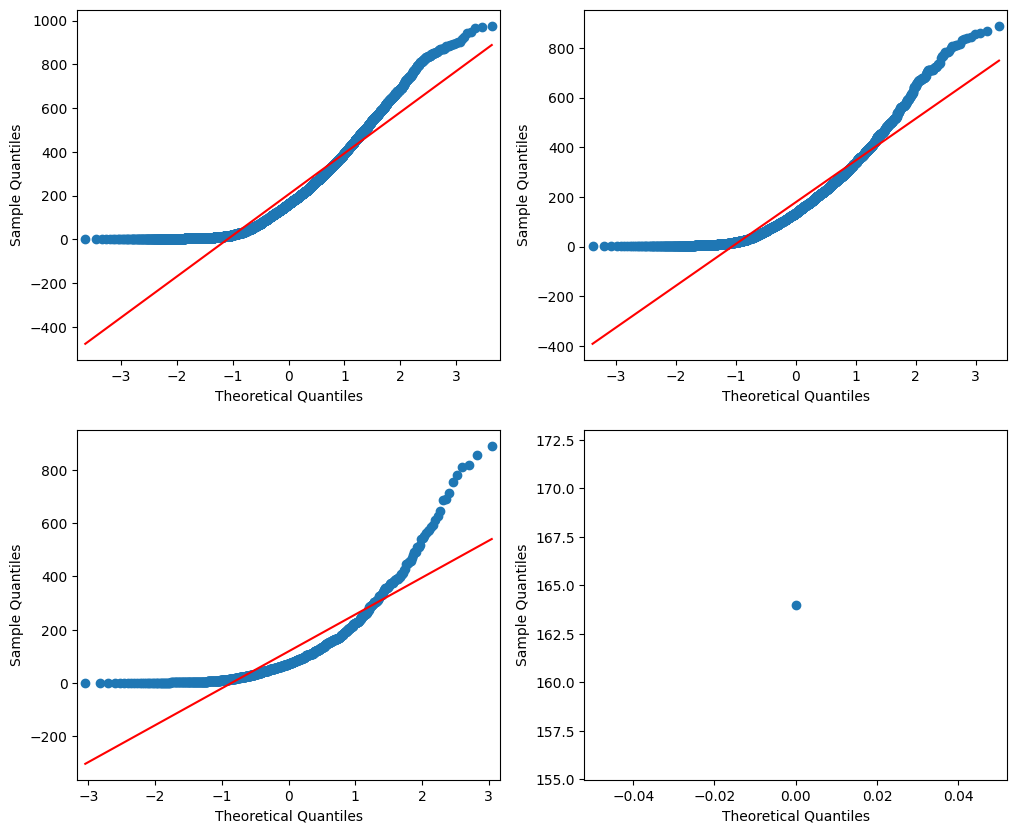

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
qqplot(df[df["weather"]==1]["count"]  ,line='s',ax=axis[0,0])
qqplot(df[df["weather"]==2]["count"]  ,line='s',ax=axis[0,1])
qqplot(df[df["weather"]==3]["count"]  ,line='s',ax=axis[1,0])
qqplot(df[df["weather"]==4]["count"]  ,line='s',ax=axis[1,1])
plt.show()

# Shapiro–Wilk test

**Test of normality**

To check Season follow Gaussian  Distribution or not

Null Hypothesis : The sample follows normal distribution
Alternate Hypothesis : The sample does not follow normal distribution

alpha = 0.05

In [15]:
test_stat, p_value = stats.shapiro(df[df['season']==1]['count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [21]:
test_stat, p_value = stats.shapiro(df[df['season']==2]['count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.2698936626506074e-37
The sample does not follow normal distribution


In [17]:
test_stat, p_value = stats.shapiro(df[df['season']==3]['count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.2387849353940084e-35
The sample does not follow normal distribution


In [16]:
test_stat, p_value = stats.shapiro(df[df['season']==4]['count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.864680571820361e-38
The sample does not follow normal distribution


# *Homogeneity of Variances using Levene's test*

Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous Variance

To check Homogeneity for season

In [45]:

test_stat, p_value = stats.levene(df[df['season']==1]['count'].sample(2500),
                                df[df['season']==2]['count'].sample(2500),
                                df[df['season']==3]['count'].sample(2500),
                                df[df['season']==4]['count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.4816719772360844e-110
The samples do not have  Homogenous Variance


In [53]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = stats.kruskal(df[df['weather']==1]['count'], df[df['weather']==2]['count'], df[df['weather']==3]['count'])
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45


# Shapiro–Wilk test

**Test of normality**

To check weather follow Gaussian Distribution or not

Null Hypothesis : The sample follows normal distribution
Alternate Hypothesis : The sample does not follow normal distribution

alpha = 0.05

In [30]:
test_stat, p_value = stats.shapiro(df[df['weather']==1]['count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.314271315202231e-19
The sample does not follow normal distribution


In [27]:
test_stat, p_value = stats.shapiro(df[df['weather']==2]['count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.618787483912433e-19
The sample does not follow normal distribution


In [28]:
test_stat, p_value = stats.shapiro(df[df['weather']==3]['count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.589465744180322e-27
The sample does not follow normal distribution


# *Homogeneity of Variances using Levene's test*

Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous Variance

To check Homogeneity for Weather

In [48]:
test_stat, p_value = stats.levene(df[df['weather']==1]['count'].sample(500),
                                df[df['weather']==2]['count'].sample(500),
                                df[df['weather']==3]['count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 6.155877952365808e-16
The samples do not have  Homogenous Variance


**Chi-square test**

 to check if Weather is dependent on the season

 Null Hypothesis: Weather is independent on the season

 Alternate Hypothesis : Weather is dependent on the season

In [61]:
data_table = pd.crosstab(df['season'], df['weather'])
val=chi2_contingency(data_table)
pvalue=val[1]
if pvalue>alpha:
  print("fail to reject null hypothesis : Weather is independent on the season")
else:
  print("reject null hypothesis :  Weather is dependent on the season")
print(pvalue)

reject null hypothesis :  Weather is dependent on the season
1.549925073686492e-07


# Insights

 * The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp
('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

* Out of every 100 users, around 19 are casual users and 81 are registered users.

* The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.


* There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.


* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.


* There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.


* More than 80 % of the time, the temperature is less than 28 degrees celcius.


* More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.


* More than 85 % of the total, windspeed data has a value of less than 20.


* The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.


* The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.


* There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.


* The hourly total number of rental bikes is statistically different for different weathers.


* There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.


* The hourly total number of rental bikes is statistically different for different seasons.

# Recommendations
**Seasonal Marketing:** Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

**Time-based Pricing:**Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

**Weather-based Promotions:** Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

**User Segmentation:** Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

**Optimize Inventory:** Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

**Improve Weather Data Collection:** Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.
Customer Comfort: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

**Collaborations with Weather Services:** Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

**Seasonal Bike Maintenance:** Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

**Customer Feedback and Reviews:** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

**Social Media Marketing:** Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

**Special Occasion Discounts:** Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.